### ROC and AUC

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are essential metrics for evaluating the performance of classification models, particularly on binary classification problems.

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The AUC provides a single scalar value summarizing the model's ability to distinguish between classes.

Here is a Python code snippet using scikit-learn to demonstrate how to calculate and plot the ROC curve and the AUC score.

True Positive Rate (TPR) and False Positive Rate (FPR)
- TPR (Sensitivity or Recall): $\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$. This is the fraction of actual positive cases correctly identified.
- FPR: $\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$. This is the fraction of actual negative cases incorrectly identified as positive.

AUC Interpretation
- The Area Under the ROC Curve (AUC) ranges from 0 to 1.
- AUC = 1.0: Perfect classifier.
- AUC = 0.5: A classifier that performs no better than random guessing (the diagonal dashed line).
- AUC $\rightarrow$ 0.0: A classifier that is perfectly wrong (predicting positive when it should be negative, and vice versa).

The higher the AUC, the better the model is at distinguishing between the positive and negative classes across all possible classification thresholds.

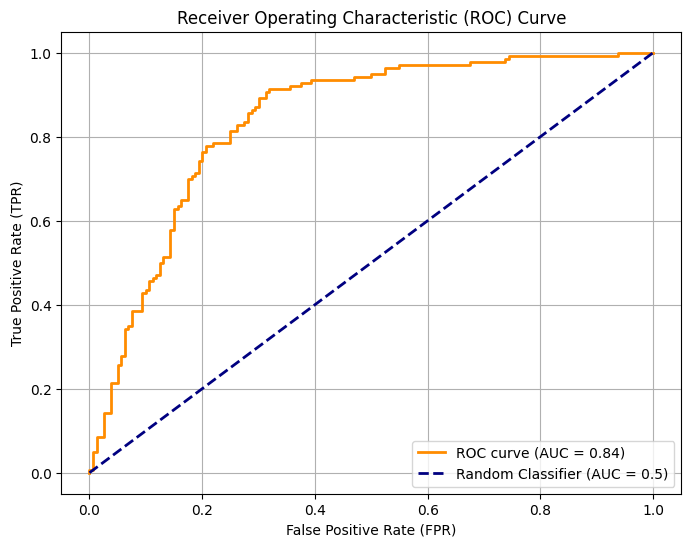

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# --- 1. Generate Synthetic Data ---
# X: features, y: target labels (0 or 1)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Train a Classifier ---
# Using Logistic Regression as an example
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# --- 3. Get Prediction Probabilities ---
# ROC curve and AUC require probability estimates, not the final class prediction
# The 'predict_proba' method returns probabilities for each class [P(y=0), P(y=1)]
y_scores = model.predict_proba(X_test)[:, 1] # We only need the probability of the positive class (class 1)

# --- 4. Calculate ROC curve metrics ---
# fpr = False Positive Rate (x-axis)
# tpr = True Positive Rate (y-axis)
# thresholds = Probability thresholds used to compute fpr and tpr
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# --- 5. Calculate the AUC score ---
# AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr) 

# --- 6. Plot the ROC Curve ---
plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
# Plot the 45-degree line (Random Classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()